<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.955 · Models avançats de mineria de dades · PAC1</p>
<p style="margin: 0; text-align:right;">2019-1 · Màster universitari en Ciència de dades (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis de Informàtica, Multimèdia i Telecomunicacions</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PAC 1: Preparació de dades

Al llarg d'aquesta pràctica veurem com aplicar diferents tècniques per a la càrrega i preparació de dades:

 <ol start="1">
  <li>Càrrega de conjunts de dades</li>
  <li>Anàlisis de les dades
  <br>2.1 Anàlisis estadístic bàsic
  <br>2.2 Anàlisis exploratori de les dades
  <li>Reducció de la dimensionalitat</li>
  <li>Entrenament i test</li>
</ol>
   
Per a això necessitarem les següents llibreries:

In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.set_option('display.max_columns', None)

# 1. Càrrega del conjunt de dades (1 punt)

En primer lloc, carregueu el conjunt de dades Breast Cancer Wisconsin (més informació a l'enllaç https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). Es pot descarregar d'Internet o es pot carregar directament desde la llibreria "scikit-learn", que incorpora un conjunt de datasets molt coneguts i usats per a la mineria de dades i machine learning (http://scikit-learn.org/stable/datasets/index.html).

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici (1pt):</strong> Carregueu el conjunt de dades "Breast Cancer Wisconsin" i mostreu:
<br> - el nombre i nom dels atributs (variables que podrien ser usades per a predir la resposta "Diagnosis")
<br> - el nombre de files del conjunt de dades
<br> - verifiqueu si hi ha o no dades mancants ("missing values") i en quines columnes
<hr>
Suggeriment: si useu sklearn (sklearn.datasets.load_breast_cancer), exploreu les diferents 'keys' de l'objecte obtingut.
</div>

In [2]:
# Carreguem el dataset des de sklearn
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

# Obtenim les dades del dataset
dades = dataset.data

# Obtenim els atributs del dataset
atributs = dataset.feature_names

#Carreguem els resultats (les descripcions)
resultats = pd.DataFrame(columns=['Resultat'])
for i in range(len(dataset.target)):
    resultats.loc[i] = [dataset.target_names[dataset.target[i]]]
    
# Mostrem el nombre d'atributs
nombre_atributs = len(atributs)
print("Nombre d'atributs "+str(nombre_atributs))

# Mostrem els noms dels atributs
print("Atributs: ")
for atribut in atributs:
    print(atribut)
        
# Obtenim i mostrem el nombre de files del dataset
nombre_files = np.size(dades,0)
print(nombre_files)
print("Valors nulls: "+str(np.count_nonzero(pd.isnull(dades))))
print("Valors NaN: "+str(np.count_nonzero(np.isnan(dades))))   

Nombre d'atributs 30
Atributs: 
mean radius
mean texture
mean perimeter
mean area
mean smoothness
mean compactness
mean concavity
mean concave points
mean symmetry
mean fractal dimension
radius error
texture error
perimeter error
area error
smoothness error
compactness error
concavity error
concave points error
symmetry error
fractal dimension error
worst radius
worst texture
worst perimeter
worst area
worst smoothness
worst compactness
worst concavity
worst concave points
worst symmetry
worst fractal dimension
569
Valors nulls: 0
Valors NaN: 0


# 2. Anàlisis de les dades (4 punts)

## 2.1 Anàlisis estadístic bàsic

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici (0,8pts):</strong> Realitzeu un anàlisis estadístic bàsic:
<br> - il·lustreu gràficament la freqüència d'aparició de les variables categòriques, indicant el nombre
<br> - calculeu per a cada atribut numèric del conjunt de dades, el seu valor mitjà i la seva desviació estàndard. 
<hr>
Suggeriment: podeu usar la llibreria 'pandas' i les seves funcions 'describe' i 'value_counts'
</div>

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
                     mean radius  mean texture  mean perimeter   mean area  \
Mitja                  14.127292     19.289649       91.969033  654.889104   
Desviació estàndard     3.524049      4.301036       24.298981  351.914129   

                     mean smoothness  mean compactness  mean concavity  \
Mitja                       0.096360          0.104341        0.088799   
Desviació estàndard         0.014064          0.052813        0.079720   

                     mean concave points  mean symmetry  \
Mitja                           0.048919       0.181162   
Desviació estàndard             0.038803       0.027414   

                     mean fractal dimension  radius error  texture error  \
Mitja                              0.062798     

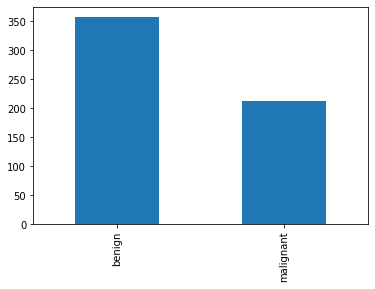

In [3]:
# Convertim a dataframe de pandas per a facilitar el tractament
df = pd.DataFrame(data=dades, columns=atributs)
# Cerquem les columnes categòriqyes
# Podem veure que totes són float64, no hi ha categòriques
for i in df.columns:
    print(df[i].dtype)
    
# Mitja i desviació típica del atributs numèrics
dataRes = pd.DataFrame([df.mean(), df.std()], index=['Mitja', 'Desviació estàndard'])
print(dataRes)

# Pintem com a categòrica la variable de resultats
hist = resultats['Resultat'].value_counts().plot(kind='bar')

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisis (0,2pts):</strong> Comenteu els resultats.
</div>

## 2.2 Anàlisis exploratori de les dades

En aquest exercici explorarem la relació d'alguns dels atributs numèrics amb la variable resposta ("Diagnosis"), tant gràficament com quantitativament i analitzarem les diferents correlacions. Per començar, seleccioneu els 4 atributs que voleu explorar. Si esteu usant els noms de columnes proporcionats per sklearn, una llista de possibles noms d'atributs seria:

In [115]:
feats_to_explore = ['mean radius', 'mean texture', 'mean smoothness', 'mean symmetry']
# Montem les dades
df2_2 = df.loc[:, feats_to_explore]
df2_2['Result'] = resultats

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici (0,5pts):</strong> Utilitzant una llibreria gràfica, com per exemple "matplotlib", realitzeu un gràfic de l'histograma de valors per a cada un dels atributs seleccionats, separats pels valors de classe de la resposta. 

La finalitat és observar com es distribueix cadascun dels atributs en funció del valor de classe que tinguin, per a poder identificar de forma visual i ràpida si alguns atributs permeten diferenciar de forma clara els diferents diagnòstics dels tumors.
</div>

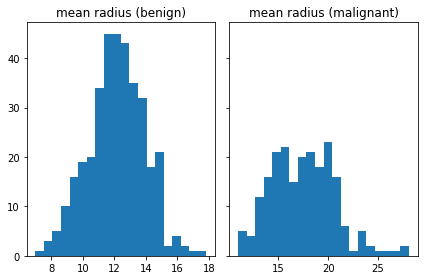

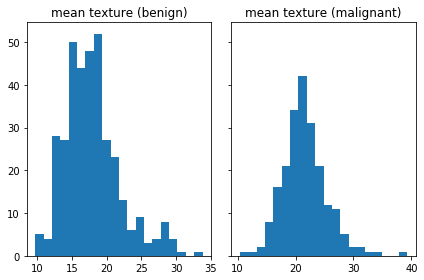

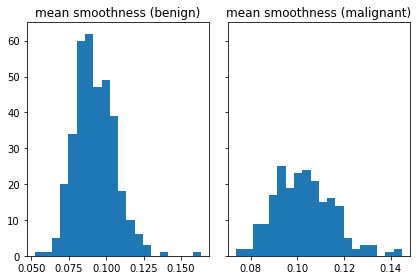

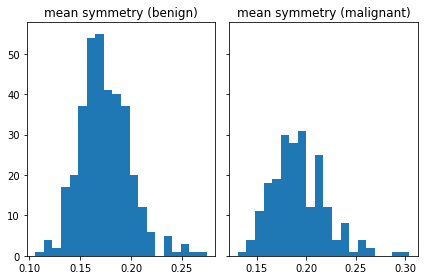

In [116]:
df2_2_benign = df2_2[df2_2['Result']=='benign']
df2_2_malignant = df2_2[df2_2['Result']=='malignant']
for i in feats_to_explore:
    fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
    axs[0].set_title(i + " (benign)")
    axs[0].hist(df2_2_benign[i], bins=20)        
    axs[1].set_title(i + " (malignant)")
    axs[1].hist(df2_2_malignant[i], bins=20)        

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici (0,5pts):</strong> Per a cada un dels atributs representats en l'exercici anterior, mostreu la mitjana i la desviació estàndard per a cada valor de classe de la resposta. 

La finalitat és verificar numèricament les diferències identificades anteriorment de forma visual.
</div>

In [117]:
for i in feats_to_explore:
    mitjab = df2_2_benign[i].mean()        
    mitjam = df2_2_malignant[i].mean()
    print("Mitja "+str(i)+" - benigne :"+str(mitjab) + " - maligne :"+str(mitjam))
    stdb = df2_2_benign[i].std()        
    stdm = df2_2_malignant[i].std()
    print("Desviació estàndard "+str(i)+" - benigne :"+str(stdb) + " - maligne :"+str(stdm))        

Mitja mean radius - benigne :12.146523809523808 - maligne :17.462830188679245
Desviació estàndard mean radius - benigne :1.7805116461410393 - maligne :3.203971100779367
Mitja mean texture - benigne :17.914761904761903 - maligne :21.60490566037736
Desviació estàndard mean texture - benigne :3.995124593675911 - maligne :3.7794699207763403
Mitja mean smoothness - benigne :0.09247764705882354 - maligne :0.10289849056603775
Desviació estàndard mean smoothness - benigne :0.013446077330274128 - maligne :0.012608235501058329
Mitja mean symmetry - benigne :0.1741859943977591 - maligne :0.1929089622641509
Desviació estàndard mean symmetry - benigne :0.02480675820679328 - maligne :0.02763809214303017


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici (0,5pts):</strong> Calculeu i mostreu la correlació entre totes les variables del conjunt de dades.
</div>

                 mean radius  mean texture  mean smoothness  mean symmetry
mean radius         1.000000      0.323782         0.170581       0.147741
mean texture        0.323782      1.000000        -0.023389       0.071401
mean smoothness     0.170581     -0.023389         1.000000       0.557775
mean symmetry       0.147741      0.071401         0.557775       1.000000


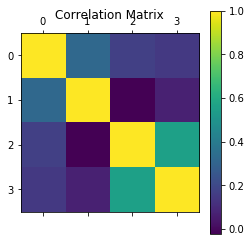

In [7]:
# Matriu de correlaciones
corr = df2_2.corr()
print(corr)
# Gràficament
plt.matshow(corr)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix')
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici (0,5pts):</strong> Representeu gràficament les relacions entre totes les parelles de les variables "mean" del conjunt de dades. La finalitat és podeu observar i analitzar les correlacions de manera gràfica entre algunes de les variables.
<hr>Suggeriment: podeu usar la funció "pairplot" de la llibreria 'seaborn'.
</div>

                        mean radius  mean texture  mean perimeter  mean area  \
mean radius                1.000000      0.323782        0.997855   0.987357   
mean texture               0.323782      1.000000        0.329533   0.321086   
mean perimeter             0.997855      0.329533        1.000000   0.986507   
mean area                  0.987357      0.321086        0.986507   1.000000   
mean smoothness            0.170581     -0.023389        0.207278   0.177028   
mean compactness           0.506124      0.236702        0.556936   0.498502   
mean concavity             0.676764      0.302418        0.716136   0.685983   
mean concave points        0.822529      0.293464        0.850977   0.823269   
mean symmetry              0.147741      0.071401        0.183027   0.151293   
mean fractal dimension    -0.311631     -0.076437       -0.261477  -0.283110   

                        mean smoothness  mean compactness  mean concavity  \
mean radius                    0.170581   

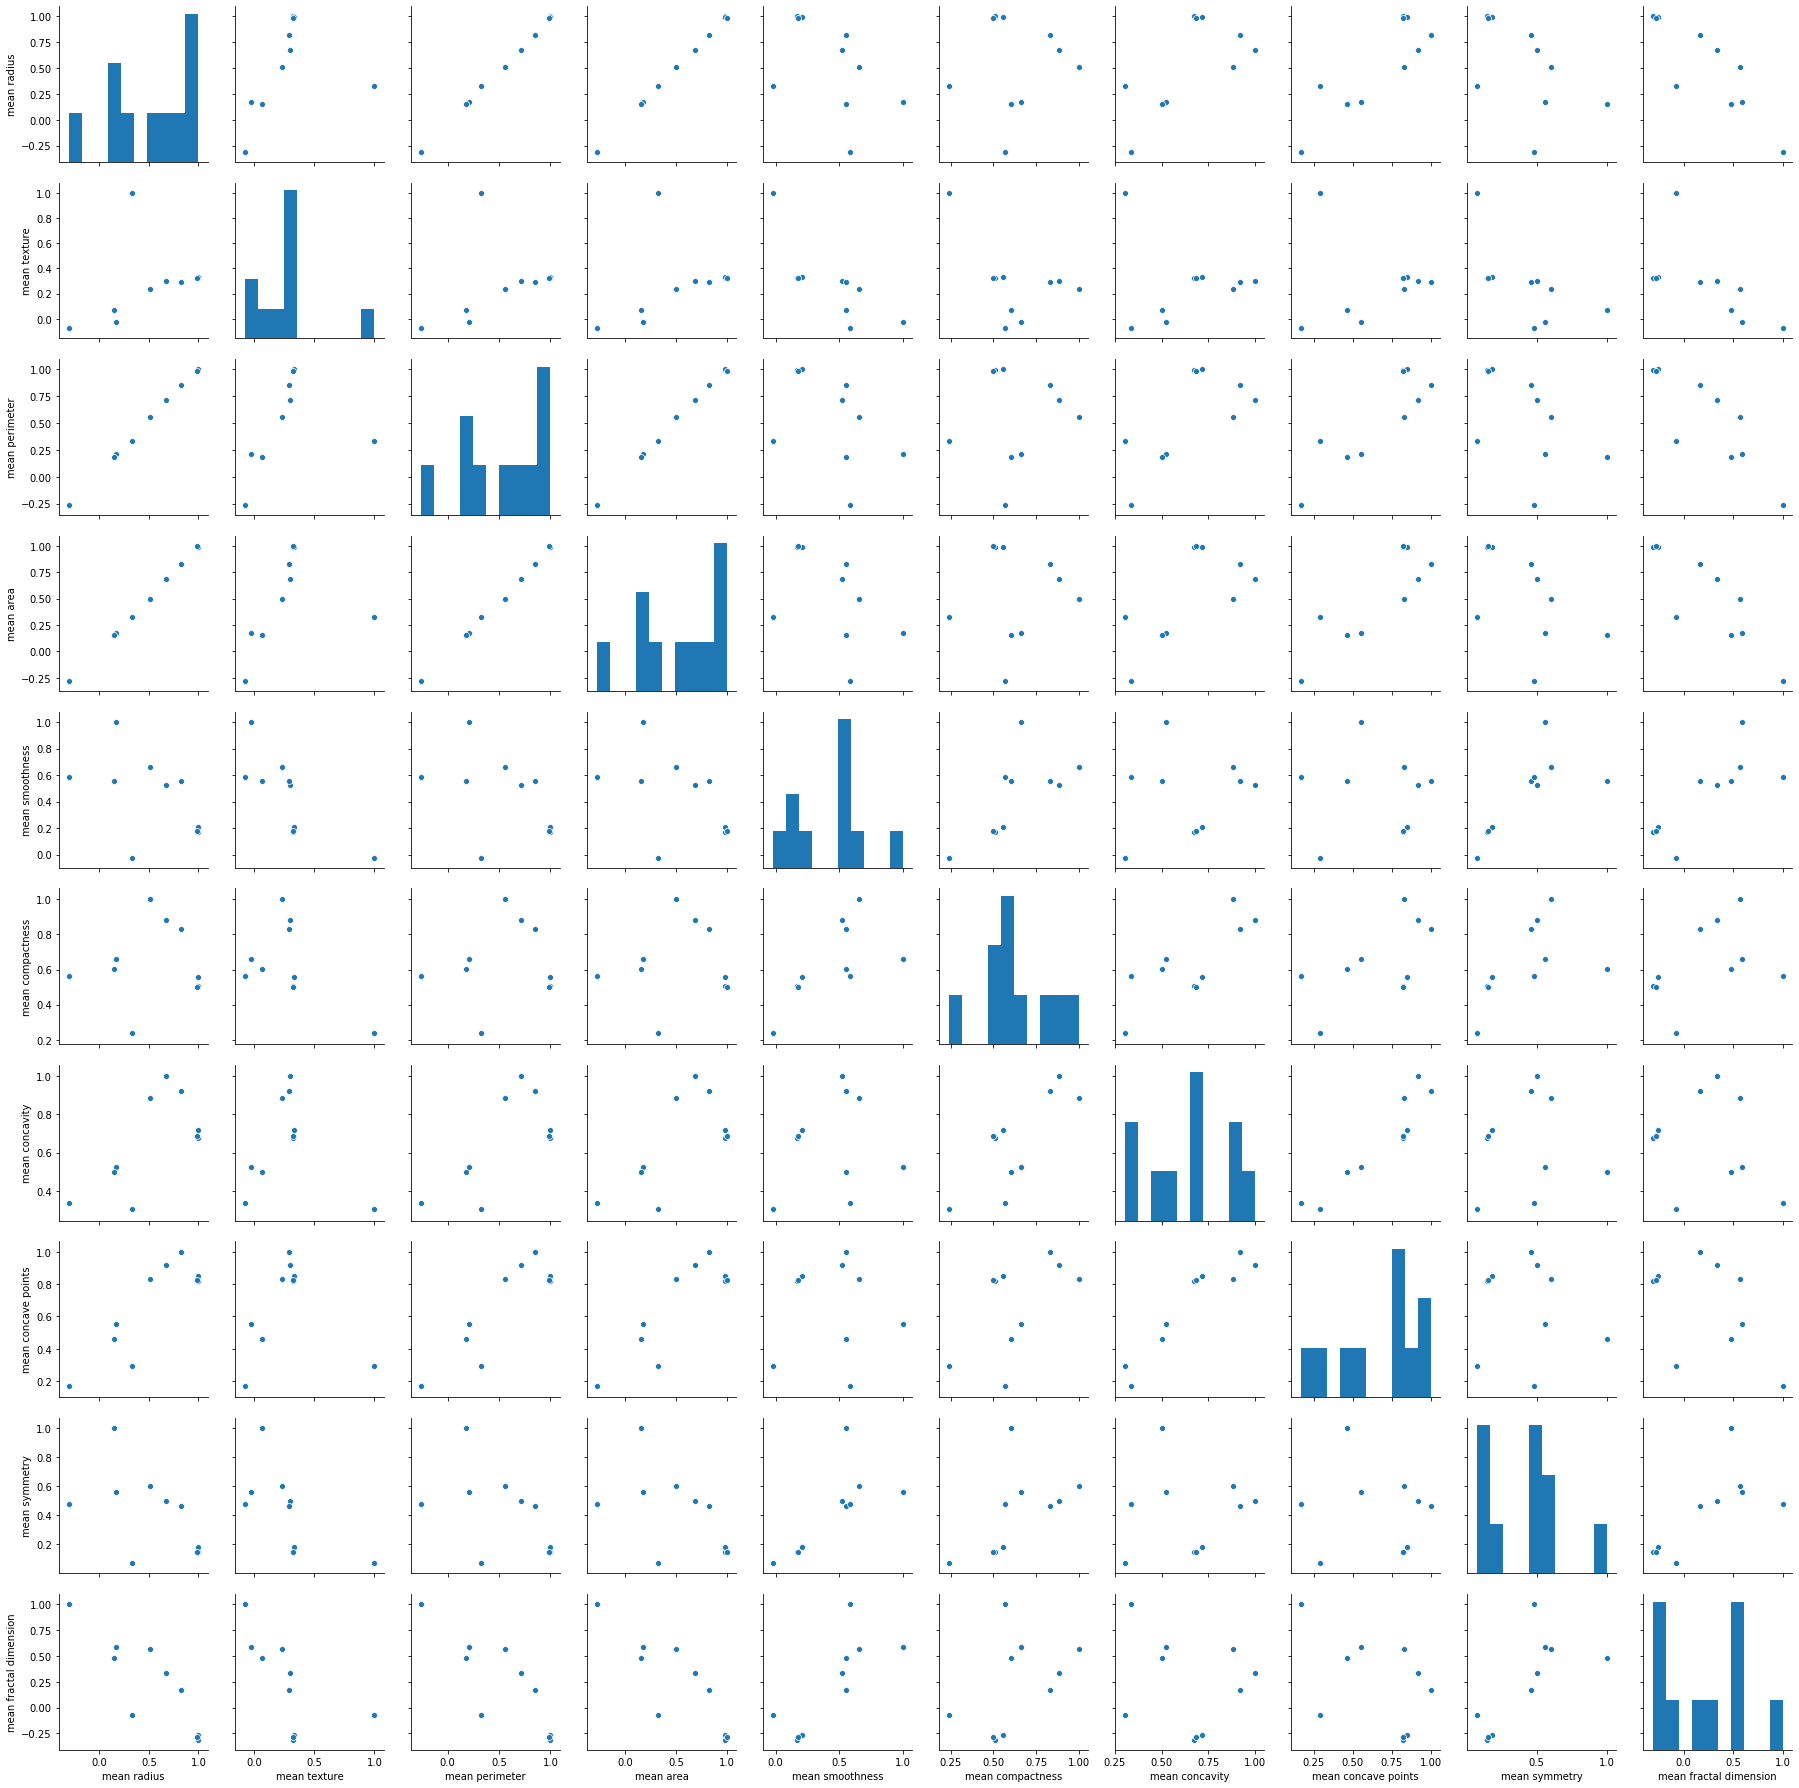

In [96]:
feats_to_explore = ['mean radius','mean texture','mean perimeter','mean area','mean smoothness','mean compactness',
                    'mean concavity','mean concave points','mean symmetry','mean fractal dimension']
# Obtenim les dades
df2_2 = df.loc[:, feats_to_explore]
corr = df2_2.corr()
#Mostrem la matriu de correlacions
print(corr)
# Gràficament
sns.pairplot(corr)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici (0,5pts):</strong> Determineu quines són les variables amb una correlació superior al 90% i creeu un nou conjunt de dades (dataframe) eliminant aquestes variables.
</div>

In [99]:
# Copiem totes les columnes al nou data frame
df2_2b = df2_2
# Cerquem els valors que superin el 0.9 a la matriu de correlació
# Eliminem les columnes al nou data frame
correlacio = 0.9
ncol = 0
for ind, column in enumerate(corr.columns):
    nrow = 0
    for index, row in corr.iterrows():
        if ((corr.iat[nrow,ncol] > correlacio) & (nrow > ncol)):
            print("Columna: "+column+ " - Fila:"+index+" - Value: "+str(corr.iat[nrow,ncol]))
            df2_2b.drop(columns=index)
        nrow = nrow + 1
    ncol = ncol + 1
    
# Comprovem visualment que hem elliminat les columnes    
corr = df2_2b.corr()
print(corr)

Columna: mean radius - Fila:mean perimeter - Value: 0.9978552814938113
Columna: mean radius - Fila:mean area - Value: 0.9873571700566119
Columna: mean perimeter - Fila:mean area - Value: 0.9865068039913906
Columna: mean concavity - Fila:mean concave points - Value: 0.9213910263788593
                        mean radius  mean texture  mean perimeter  mean area  \
mean radius                1.000000      0.323782        0.997855   0.987357   
mean texture               0.323782      1.000000        0.329533   0.321086   
mean perimeter             0.997855      0.329533        1.000000   0.986507   
mean area                  0.987357      0.321086        0.986507   1.000000   
mean smoothness            0.170581     -0.023389        0.207278   0.177028   
mean compactness           0.506124      0.236702        0.556936   0.498502   
mean concavity             0.676764      0.302418        0.716136   0.685983   
mean concave points        0.822529      0.293464        0.850977   0.82326

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisis (0,5pts):</strong>
<br> - Mirant els primers histogrames, quins atributs et sembla que tenen valors clarament diferents per a diagnòstics benignes i malignes? Quins atributs no?
<br> - Mirant els valors mitjans i les desviacions estàndard calculades, et semblen significatives les diferències per a diagnòstics benignes i malignes?
<br> - Mirant les correlacions, quines variables són les que tenen una correlació més forta i han estat eliminades? Quin efecte pot tenir en el resultat final el fet d'eliminar-les o no?
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>BONUS:</strong>
<br> Quin test estadístic podries usar per comparar les distribucions dels valors dels atributs quan els diagnòstics són benignes o malignes? Usa'l per evaluar quins atributs (d'entre tots els del conjunt de dades) tenen valors més semblants en tumors benignes i malignes. Interpreta el resultat.
</div>

# 3. Reducció de la dimensionalitat (2 punts)

En aquest exercici s'aplicarà un mètode de reducció de la dimensionalitat al conjunt original de dades. L'objectiu és reduïr el conjunt d'atributs a un nou conjunt amb menys dimensions.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici (1pt):</strong> Apliqueu el mètodes de reducció de la dimensionalitat Principal Component Analysis (PCA) per reduir a 2 dimensions:
 <br> - el conjunt de dades original
 <br> - el conjunt de dades al qual se li han extret les variables fortament correlacionades

<hr>
Suggeriment: No és necessari que programeu els algorismes, poder usar les implementacions disponibles en la llibreria "scikit-learn".
</div>

In [125]:
def calc_pca(X, y):
    # Configurem pca per a 2 dimensions
    pca = PCA(n_components=2)
    # Normalitzem les dades
    reduced_X = pca.fit_transform(X)
    print(reduced_X)
    return X

# Cridem el procés amb les dades originals
pca_dades_originals = calc_pca(dataset.data, dataset.target)
# Cridem el procés amb les dades tractades a l'exercici 2b
pca_dades_tractades = calc_pca(df2_2b, dataset.target)

[[1160.1425737  -293.91754364]
 [1269.12244319   15.63018184]
 [ 995.79388896   39.15674324]
 ...
 [ 314.50175618   47.55352518]
 [1124.85811531   34.12922497]
 [-771.52762188  -88.64310636]]
[[ 3.47389726e+02  3.45028779e+00]
 [ 6.72360671e+02  6.22445386e+00]
 [ 5.49459902e+02 -2.91600825e-01]
 ...
 [ 2.03898286e+02 -7.80176333e+00]
 [ 6.12040133e+02 -1.00662623e+01]
 [-4.75802622e+02  1.90641405e+00]]


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici (1pt):</strong> Genereu un gràfic (en 2D) amb el resultat del PCA usant colors diferents per a cada classe de la resposta, amb l'objectiu de visualitzar si és possible separar eficientment les classes amb aquests mètode. Comenteu el resultat. </div>

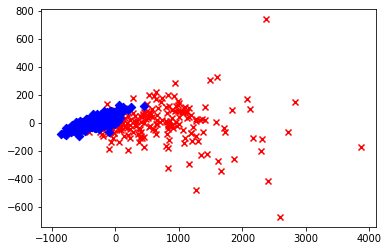

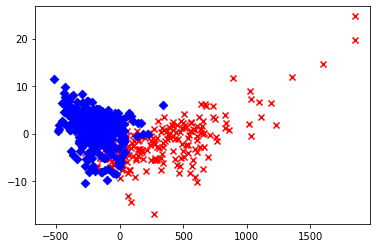

In [128]:
def pinta_pca(X, y):
    # Configurem pca per a 2 dimensions
    pca = PCA(n_components=2)
    # Normalitzem les dades
    reduced_X = pca.fit_transform(X)    
    
    # Definim els arrays on guardarem els casos tractats
    red_x, red_y = [], []
    blue_x, blue_y = [], []
    green_x, green_y = [], []
    
    # Classifiquem depenent del resultat
    for i in range(len(reduced_X)):
        if y[i] == 0:
            red_x.append(reduced_X[i][0])
            red_y.append(reduced_X[i][1])
        elif y[i] == 1:
            blue_x.append(reduced_X[i][0])
            blue_y.append(reduced_X[i][1])
        else:
            green_x.append(reduced_X[i][0])
            green_y.append(reduced_X[i][1])
    plt.scatter(red_x, red_y, c='r', marker='x')
    plt.scatter(blue_x, blue_y, c='b', marker='D')
    plt.scatter(green_x, green_y, c='g', marker='.')
    plt.show()    

# Cridem el procés amb les dades originals
pinta_pca(dataset.data, dataset.target)
# Cridem el procés amb les dades tractades a l'exercici 2b
pinta_pca(df2_2b, dataset.target)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>BONUS:</strong>
<br> Quin o quins altres mètodes de reducció de la dimensionalitat es podrien aplicar? Escolliu un i genereu el gràfic (2D) amb el resultat. En comparació amb el PCA, quin mètode ha resultat més efectiu per a visualitzar les dues classes de diagnòstic de forma separada? Quan és més apropiat usar PCA o l'altre mètode escollit?
</div>

# 4. Entrenament i test (3 punts)

En aquest últim exercici es tracta d'aplicar un mètode d'aprenentatge supervisat, concretament el classificador Random Forest, per a predir el diagnòstic de càncer de mama (tumor benigne o maligne) i evaluar la precisió obtinguda amb el model, usant:

- El conjunt de dades original amb tots els atributs
- El conjunt de dades reduït a només 2 atributs amb el mètode PCA
- El conjunt de dades sense les variables fortament correlacionades i reduït a només 2 atributs amb el mètode PCA

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici (2pts):</strong> Entreneu tres models usant el classificador Random Forest (amb 10 estimadors per mantenir el model simple): 
 <br> (1) usant el conjunt de dades original,
 <br> (2) usant el conjunt de dades reduït amb PCA, 
 <br> (3) usant el conjunt de dades sense les variables fortament correlacionades i reduït amb PCA.
<br>
<br>Calculeu la precisió de les prediccions obtingudes per cadascun dels models (accuracy) així com la matriu de confusió associada i compareu.
<hr>
Suggeriment: és necessari que genereu un conjunt de dades d'entrenament per a calibrar el model, i un altre conjunt de test per a evaluar la bondat de cadascun dels models creats. Podeu usar els mòduls 'train_test_split', 'RandomForestClassifier' i les funcions dins del mòdul 'metrics' de sckit-learn.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisis (1pt):</strong>
<br> - Amb quin tipus de dades (originals, reduïdes amb PCA, o sense les fortes correlacions) has obtingut una millor precisió (accuracy)?
<br> - Si l'usuari del model de predicció, un hospital per exemple, volgués usar el model amb el menor número de tumors malignes erròniament classificats com a benignes, quin dels tres models hauria de fer servir? Per què?
<br> - I si l'hospital volgués usar el model amb el menor número de tumors benignes erròniament classificats com a malignes, quin dels tres models hauria de fer servir? Per què?
</div>